In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Introduction

The goal of this project was to develop and make a couple of models that can accurately predict the diagnosis (malignant or benign) of a breast tumor based on the physical characteristics of the tumor.

This project originated as a final project for my class, 'DAT 350: Data Management and Data Science'. The inspiration for this project at the time came from an interest of working with healthcare related data. This was my entry point into gaining hands-on experience with machine learning as well as discovering my passion for machine learning.

I recently decided to pick this project back up and make some minor improvements/polish it up a bit. Most of the code will remain fundamentally the same.

In [103]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Misc libraries
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing and Exploratory Data Analysis

In this section of the project, we will be performing the loading, exploration, and cleaning of the data.

This will include checking for null values, cleaning up and removing variables not useful for our analysis, a statistical analysis of our data, and producing visualizations of our data to check for outliers, distribution of variables, etc.

## Loading and Peeking at the Data

In [104]:
# <--- Loading and Peeking at the Data --->

# Load the dataset
raw_df = pd.read_csv("/content/drive/MyDrive/Datasets/Cancer_Data.csv")

print("Dataset Information:")
print(f"Shape: {raw_df.shape}")
print(f"Columns: {raw_df.columns.tolist()}")
print("\nFirst 5 rows:")
raw_df.head()

Dataset Information:
Shape: (569, 33)
Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

First 5 rows:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [105]:
# <--- Checking for Null Values and Summary Stats --->

# Check for NA values in the data
for col in raw_df:
    naCount = raw_df[col].isna().sum()
    print(f"The number of NA values in the {col} col is {naCount}")

# Total missing values
print("\nMissing Values Analysis:")
missing_counts = raw_df.isnull().sum()
print(f"Total missing values: {missing_counts.sum()}")

# Check data types
print("\nData Types:")
print(raw_df.dtypes.value_counts())

# Basic statistics
print("\nBasic Statistics:")
raw_df.describe()

The number of NA values in the id col is 0
The number of NA values in the diagnosis col is 0
The number of NA values in the radius_mean col is 0
The number of NA values in the texture_mean col is 0
The number of NA values in the perimeter_mean col is 0
The number of NA values in the area_mean col is 0
The number of NA values in the smoothness_mean col is 0
The number of NA values in the compactness_mean col is 0
The number of NA values in the concavity_mean col is 0
The number of NA values in the concave points_mean col is 0
The number of NA values in the symmetry_mean col is 0
The number of NA values in the fractal_dimension_mean col is 0
The number of NA values in the radius_se col is 0
The number of NA values in the texture_se col is 0
The number of NA values in the perimeter_se col is 0
The number of NA values in the area_se col is 0
The number of NA values in the smoothness_se col is 0
The number of NA values in the compactness_se col is 0
The number of NA values in the concavity_

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Cleaning Data and Analyzing Class Distribution

You may have noticed that there is a column, 'Unnamed 32:' that contains all the missing values in our dataset. We will remove that column along with the 'id' column as those aren't useful for the project. While we're modifying the data, we will also convert the 'diagnosis' column to binary (Malignant = 1, Benign = 0).

We will visualize the class distribution as well.

Class Distribution:
Benign (0): 357 (62.7%)
Malignant (1): 212 (37.3%)


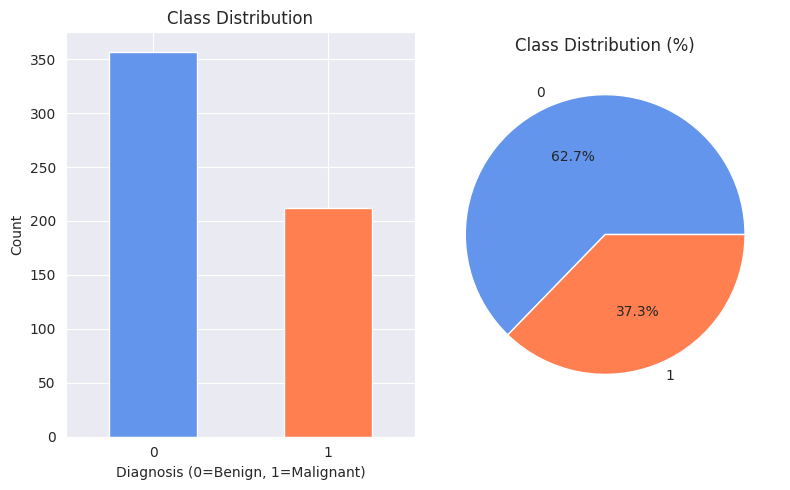


Data Shape: (569, 31)


In [106]:
# <--- Data Cleaning and Class Distribution --->

# Clean the data
cleaned_df = raw_df.drop(["Unnamed: 32", "id"], axis=1, errors='ignore')

# Convert diagnosis to binary (1 for Malignant, 0 for Benign)
cleaned_df.diagnosis = [1 if each == "M" else 0 for each in cleaned_df.diagnosis]

# Analyze class distribution
print("Class Distribution:")
class_counts = cleaned_df['diagnosis'].value_counts()
print(f"Benign (0): {class_counts[0]} ({class_counts[0]/len(cleaned_df)*100:.1f}%)")
print(f"Malignant (1): {class_counts[1]} ({class_counts[1]/len(cleaned_df)*100:.1f}%)")

# Visualize class distribution
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
cleaned_df['diagnosis'].value_counts().plot(kind='bar', color=['cornflowerblue', 'coral'])
plt.title('Class Distribution')
plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
cleaned_df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['cornflowerblue', 'coral'])
plt.title('Class Distribution (%)')
plt.ylabel('')

plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

print(f"\nData Shape: {cleaned_df.shape}")

## Confusion Matrix

Here we will plot a confusion matrix to help us get a better understanding of which variables in the dataset are correlated with one another. We will also return the top 10 highest correlated variables (|r| > 0.8).

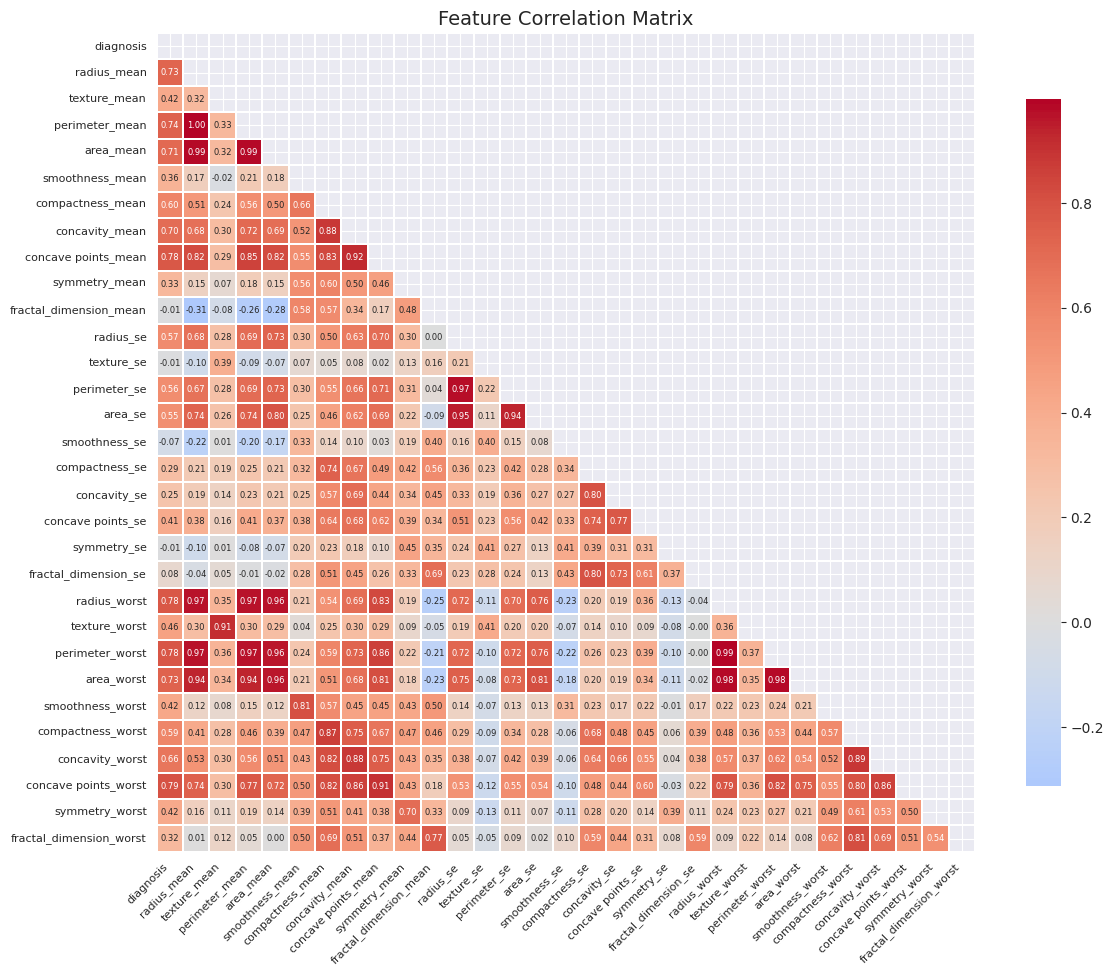

Found 44 highly correlated feature pairs (|r| > 0.8)

Top 10 correlations:
 1. radius_mean - perimeter_mean: 0.998
 2. radius_worst - perimeter_worst: 0.994
 3. radius_mean - area_mean: 0.987
 4. perimeter_mean - area_mean: 0.987
 5. radius_worst - area_worst: 0.984
 6. perimeter_worst - area_worst: 0.978
 7. radius_se - perimeter_se: 0.973
 8. perimeter_mean - perimeter_worst: 0.970
 9. radius_mean - radius_worst: 0.970
10. perimeter_mean - radius_worst: 0.969


In [107]:
# <--- Correlation Matrix --->

# Plot confusion matrix
plt.figure(figsize=(12, 10))  # Reduced from (20, 16)
corr_matrix = cleaned_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate heatmap with smaller annotations
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f',square=True, linewidths=0.3, annot_kws={'size': 6}, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()

plt.savefig('correlation_matrix_small.png', bbox_inches='tight')
plt.show()

# Find highly correlated features
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8 and corr_matrix.columns[i] != 'diagnosis':
            high_corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (|r| > 0.8)")
print("\nTop 10 correlations:")
for i, (feat1, feat2, corr) in enumerate(sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:10]):
    print(f"{i+1:2d}. {feat1} - {feat2}: {corr:.3f}")

## Train-Test Split with Stratification

To prepare the data for modeling, we separate the features (`X`) from the target variable (`y`), which is the diagnosis. We then perform a train-test split, ensuring that the split maintains the original distribution of classes (malignant vs. benign) using stratification. This is especially important in medical datasets where class imbalance can affect model performance and evaluation.

We use 75% of the data for training and 25% for testing, with a fixed random seed for reproducibility.

In [108]:
# <--- Train, Test, Split --->

# Separate features and target
X = cleaned_df.drop('diagnosis', axis=1)
y = cleaned_df['diagnosis']

# Split data with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Data Split Summary:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training set malignant rate: {y_train.mean():.1%}")
print(f"Test set malignant rate: {y_test.mean():.1%}")

Data Split Summary:
Training set: 426 samples
Test set: 143 samples
Training set malignant rate: 37.3%
Test set malignant rate: 37.1%


## Handling Outliers

To mitigate the effect of extreme values, we apply outlier treatment using the Interquartile Range (IQR) method. For each feature in the training set, we compute the lower and upper bounds based on 1.5 times the IQR. Any values falling outside these bounds are considered outliers.

Rather than removing outliers, which could reduce valuable data, we **cap** (clip) them to the calculated bounds. This preserves the dataset size and limits distortion from extreme values. Importantly, we apply the same bounds—derived from the training set—to both the training and test sets to avoid data leakage.

In [109]:
# <--- Handling Outliers --->

def handle_outliers_iqr(X_train, X_test, multiplier=1.5):
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()
    outlier_info = {}

    for column in X_train.columns:
        Q1 = X_train[column].quantile(0.25)
        Q3 = X_train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Count outliers in training set
        outliers_mask = ((X_train[column] < lower_bound) | (X_train[column] > upper_bound))
        outliers_count = outliers_mask.sum()

        if outliers_count > 0:
            outlier_info[column] = {'count': outliers_count, 'percentage': outliers_count / len(X_train) * 100, 'bounds': (lower_bound, upper_bound)}

            # Cap outliers in both training and test sets using training bounds
            X_train_processed[column] = np.clip(X_train[column], lower_bound, upper_bound)
            X_test_processed[column] = np.clip(X_test[column], lower_bound, upper_bound)

    return X_train_processed, X_test_processed, outlier_info

X_train_clean, X_test_clean, outlier_info = handle_outliers_iqr(X_train, X_test)

# Models

## Model Initialization and Hyperparameter Grids

We define a set of classification models, each wrapped in a `Pipeline` that includes Min-Max scaling followed by the estimator. This ensures all features are on the same scale which is a key step for models sensitive to feature magnitudes (e.g., SVM, K-NN, Neural Networks).

Each model is associated with a hyperparameter grid for tuning via grid search. The following models are included:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Neural Network (MLPClassifier)**
- **Decision Tree**
- **Random Forest**
- **K-Nearest Neighbors (K-NN)**

Each configuration is stored in a dictionary, allowing for efficient iteration during model training and evaluation.

In [110]:
# <--- Model Initialization --->

# Define models and parameter grids
models_config = {
    'Logistic Regression': {
        'model': Pipeline([
            ('scaler', MinMaxScaler()),
            ('clf', LogisticRegression(random_state=42))
        ]),
        'params': {
            'clf__penalty': ['l1', 'l2'],
            'clf__C': [0.01, 0.1, 1, 10, 100],
            'clf__solver': ['liblinear']
        }
    },
    'SVM': {
        'model': Pipeline([
            ('scaler', MinMaxScaler()),
            ('clf', SVC(random_state=42))
        ]),
        'params': {
            'clf__C': [1, 10, 100, 1000],
            'clf__gamma': ['scale', 0.1, 0.01, 0.001, 0.0001],
            'clf__kernel': ['linear', 'rbf']
        }
    },
    'Neural Network': {
        'model': Pipeline([
            ('scaler', MinMaxScaler()),
            ('clf', MLPClassifier(max_iter=1000, random_state=42))
        ]),
        'params': {
            'clf__hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'clf__alpha': [0.0001, 0.001],
            'clf__learning_rate': ['constant', 'adaptive']
        }
    },
    'Decision Tree': {
        'model': Pipeline([
            ('scaler', MinMaxScaler()),
            ('clf', DecisionTreeClassifier(random_state=42))
        ]),
        'params': {
            'clf__max_depth': [None, 10, 20],
            'clf__min_samples_split': [2, 5],
            'clf__min_samples_leaf': [1, 2]
        }
    },
    'Random Forest': {
        'model': Pipeline([
            ('scaler', MinMaxScaler()),
            ('clf', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [None, 10, 20],
            'clf__min_samples_split': [2, 5]
        }
    },
    'K-NN': {
        'model': Pipeline([
            ('scaler', MinMaxScaler()),
            ('clf', KNeighborsClassifier())
        ]),
        'params': {
            'clf__n_neighbors': [3, 5, 7, 9],
            'clf__weights': ['uniform', 'distance']
        }
    }
}

print(f"Total models to train: {len(models_config)}")

Total models to train: 6


## Model Training

In [111]:
# <--- Model Training --->

# Scoring metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

results = []
trained_models = {}

print("Starting Model Training...")
print("=" * 60)

for name, config in models_config.items():
    print(f"\nTraining {name}...")

    # Grid search with cross-validation
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    # Fit the model
    grid_search.fit(X_train_clean, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_
    trained_models[name] = best_model

    # Cross-validation scores
    cv_scores = cross_validate(
        best_model, X_train_clean, y_train,
        cv=5, scoring=scoring_metrics, n_jobs=-1
    )

    # Test set predictions
    y_pred = best_model.predict(X_test_clean)

    # Store results
    result = {
        'Model': name,
        'CV_Accuracy': cv_scores['test_accuracy'].mean(),
        'CV_F1': cv_scores['test_f1'].mean(),
        'CV_Precision': cv_scores['test_precision'].mean(),
        'CV_Recall': cv_scores['test_recall'].mean(),
        'Test_Accuracy': accuracy_score(y_test, y_pred),
        'Test_F1': f1_score(y_test, y_pred),
        'Test_Precision': precision_score(y_test, y_pred),
        'Test_Recall': recall_score(y_test, y_pred),
        'Best_Params': grid_search.best_params_
    }

    results.append(result)

    # Summary
    print(f"{name} complete!")
    print(f"Test F1: {result['Test_F1']:.3f} | Test Accuracy: {result['Test_Accuracy']:.3f}")

print("\nAll models trained successfully!")

Starting Model Training...

Training Logistic Regression...
Logistic Regression complete!
Test F1: 0.971 | Test Accuracy: 0.979

Training SVM...
SVM complete!
Test F1: 0.971 | Test Accuracy: 0.979

Training Neural Network...
Neural Network complete!
Test F1: 0.951 | Test Accuracy: 0.965

Training Decision Tree...
Decision Tree complete!
Test F1: 0.941 | Test Accuracy: 0.958

Training Random Forest...
Random Forest complete!
Test F1: 0.940 | Test Accuracy: 0.958

Training K-NN...
K-NN complete!
Test F1: 0.940 | Test Accuracy: 0.958

All models trained successfully!


## Model Results

In [112]:
# <--- Model Results --->

results_df = pd.DataFrame(results)

# Display results
print("MODEL PERFORMANCE COMPARISON")
print("=" * 80)

# Sort by F1 score
display_df = results_df[['Model', 'Test_Accuracy', 'Test_F1', 'Test_Precision', 'Test_Recall']].round(4)
display_df_sorted = display_df.sort_values('Test_F1', ascending=False)

print(display_df_sorted.to_string(index=False))

# Find best model
best_model_name = display_df_sorted.iloc[0]['Model']
best_f1 = display_df_sorted.iloc[0]['Test_F1']
print(f"\nBest Model: {best_model_name} (F1 Score: {best_f1:.4f})")

MODEL PERFORMANCE COMPARISON
              Model  Test_Accuracy  Test_F1  Test_Precision  Test_Recall
Logistic Regression          0.979   0.9709          1.0000       0.9434
                SVM          0.979   0.9709          1.0000       0.9434
     Neural Network          0.965   0.9515          0.9800       0.9245
      Decision Tree          0.958   0.9412          0.9796       0.9057
      Random Forest          0.958   0.9400          1.0000       0.8868
               K-NN          0.958   0.9400          1.0000       0.8868

Best Model: Logistic Regression (F1 Score: 0.9709)


## Model Performance Comparison

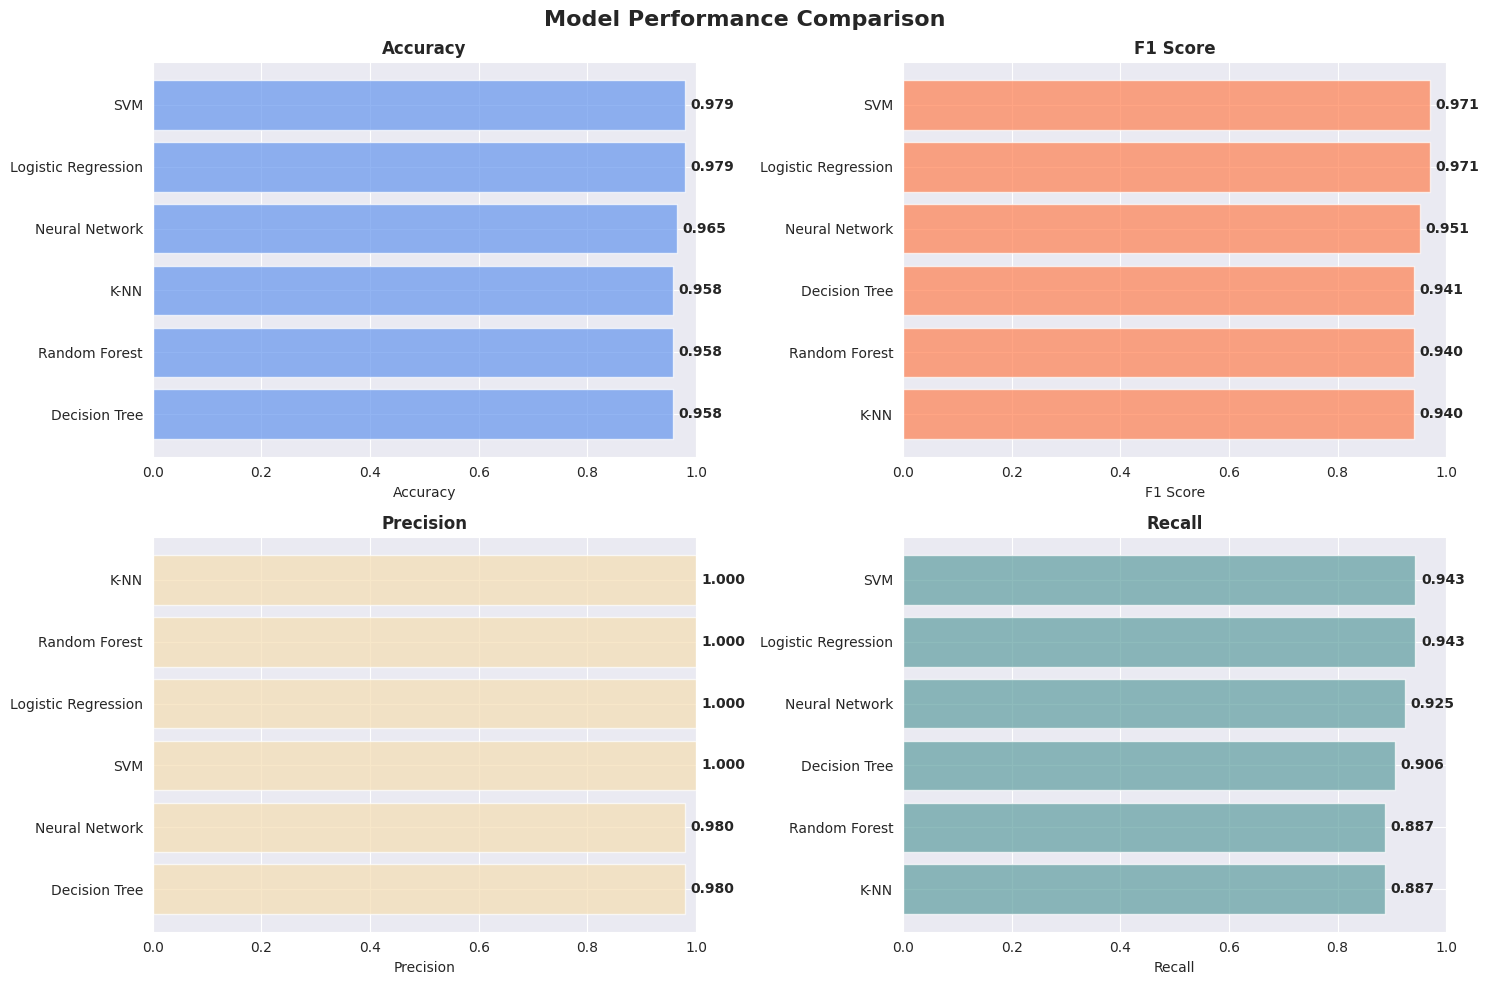

In [113]:
# <--- Model Performance Comparison --->

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics = ['Test_Accuracy', 'Test_F1', 'Test_Precision', 'Test_Recall']
titles = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
colors = ['cornflowerblue', 'coral', 'wheat', 'cadetblue']

for idx, (metric, title, color) in enumerate(zip(metrics, titles, colors)):
    ax = axes[idx//2, idx%2]

    # Sort data for better visualization
    sorted_data = results_df.sort_values(metric, ascending=True)

    bars = ax.barh(sorted_data['Model'], sorted_data[metric], color=color, alpha=0.7)
    ax.set_title(f'{title}', fontweight='bold')
    ax.set_xlabel(title)
    ax.set_xlim(0, 1)

    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
               f'{width:.3f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

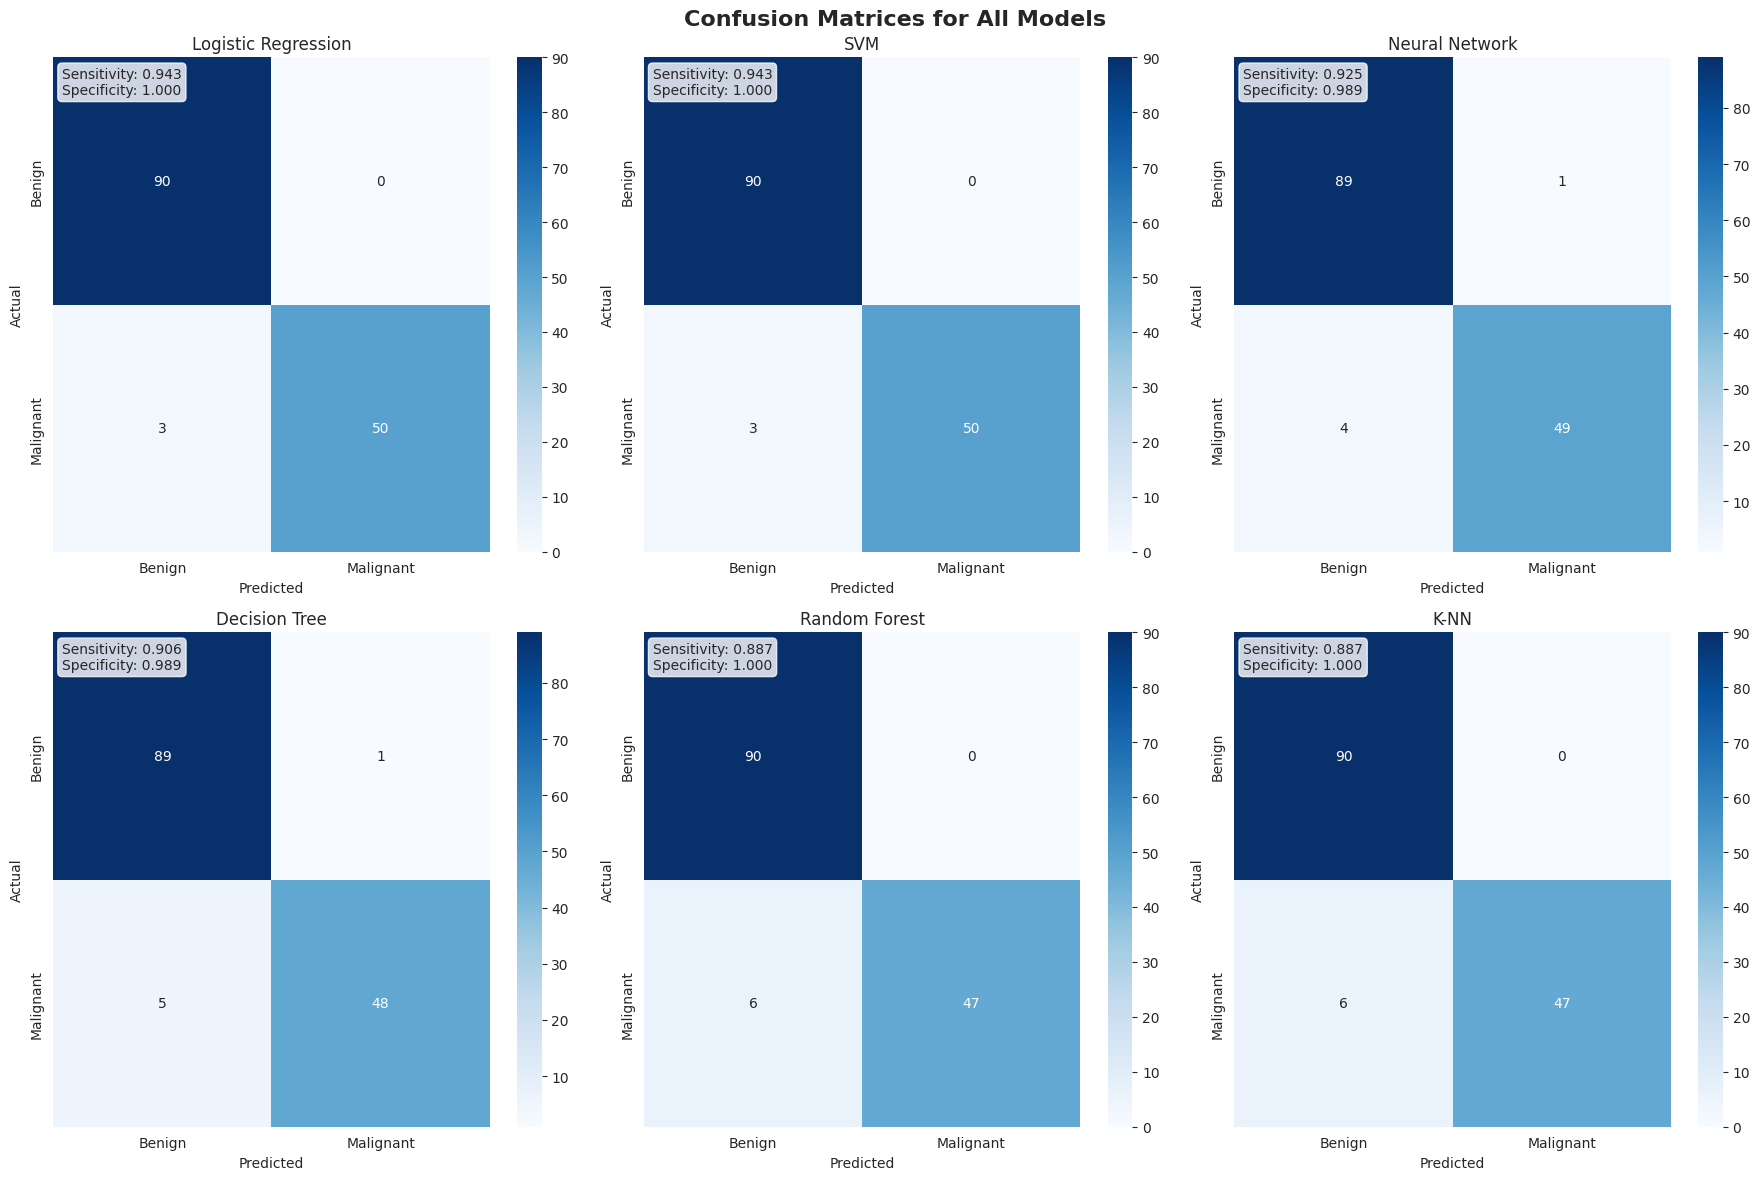

In [114]:
# <--- Confusion Matrices for Model Performance --->

# Display confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold')

axes = axes.flatten()

for idx, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test_clean)
    cm = confusion_matrix(y_test, y_pred)

    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(['Benign', 'Malignant'])
    ax.set_yticklabels(['Benign', 'Malignant'])

    # Add performance metrics as text
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    ax.text(0.02, 0.98, f'Sensitivity: {sensitivity:.3f}\nSpecificity: {specificity:.3f}',
           transform=ax.transAxes, verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

# Final Results

In [115]:
# <--- Final Results --->

print("FINAL RESULTS")
print("=" * 60)

# Analysis of best model
best_model = trained_models[best_model_name]
y_pred_best = best_model.predict(X_test_clean)
cm_best = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm_best.ravel()

print(f"\nBest Model Analysis ({best_model_name}):")
print(f"  - True Negatives (Correctly identified Benign): {tn}")
print(f"  - False Positives (Benign classified as Malignant): {fp}")
print(f"  - False Negatives (Malignant classified as Benign): {fn}")
print(f"  - True Positives (Correctly identified Malignant): {tp}")

print(f"\nKey Metrics:")
sensitivity = tp / (tp + fn)  # Recall - ability to find malignant cases
specificity = tn / (tn + fp)  # Ability to correctly identify benign cases
ppv = tp / (tp + fp)  # Precision - when model says malignant, how often is it right?
npv = tn / (tn + fn)  # When model says benign, how often is it right?

print(f"  - Sensitivity (Recall): {sensitivity:.3f} - Catches {sensitivity:.1%} of malignant cases")
print(f"  - Specificity: {specificity:.3f} - Correctly identifies {specificity:.1%} of benign cases")
print(f"  - Positive Predictive Value: {ppv:.3f} - {ppv:.1%} accuracy when predicting malignant")
print(f"  - Negative Predictive Value: {npv:.3f} - {npv:.1%} accuracy when predicting benign")

print(f"\nConsiderations:")
if fn > 0:
    print(f"  - {fn} malignant cases were missed (False Negatives)")
    print(f"  - This represents {fn/(tp+fn):.1%} of all malignant cases")
if fp > 0:
    print(f"  - {fp} benign cases were flagged as malignant (False Positives)")
    print(f"  - This represents {fp/(tn+fp):.1%} of all benign cases")

print(f"\nModel Training Complete!")
print(f"  - Best performing model: {best_model_name}")

FINAL RESULTS

Best Model Analysis (Logistic Regression):
  - True Negatives (Correctly identified Benign): 90
  - False Positives (Benign classified as Malignant): 0
  - False Negatives (Malignant classified as Benign): 3
  - True Positives (Correctly identified Malignant): 50

Key Metrics:
  - Sensitivity (Recall): 0.943 - Catches 94.3% of malignant cases
  - Specificity: 1.000 - Correctly identifies 100.0% of benign cases
  - Positive Predictive Value: 1.000 - 100.0% accuracy when predicting malignant
  - Negative Predictive Value: 0.968 - 96.8% accuracy when predicting benign

Considerations:
  - 3 malignant cases were missed (False Negatives)
  - This represents 5.7% of all malignant cases

Model Training Complete!
  - Best performing model: Logistic Regression
